The images were taken from the following (http://www.pivchallenge.org/pub03/index.html#a). From the Case A (Experimental) section the ALL IMAGES (150 MB) link. From the set of 200 images the first two A001a.tif and A001b.tif were used. 



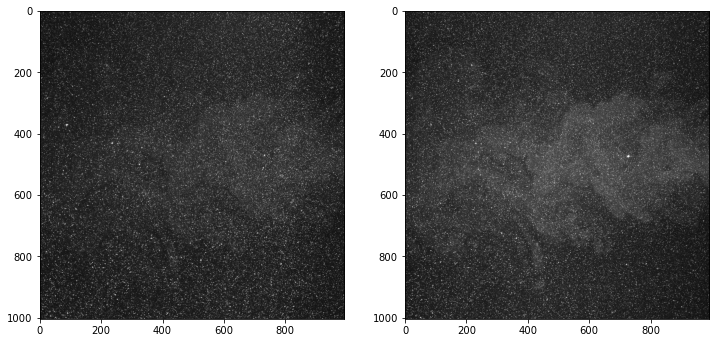

In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


frame_a  = tools.imread( '/home/antariksh/Downloads/Aall/A001a.tif' )
frame_b  = tools.imread( '/home/antariksh/Downloads/Aall/A001b.tif' )



fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)


In [2]:
winsize = 64
searchsize= 64
overlap = 32
dt = 1 # sec


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a, 
                                                       frame_b,
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')
# OpenPIV function responsible for convultaional analysis of the entire image using a search window


x, y = pyprocess.get_coordinates(image_size=frame_a.shape, 
                                 search_area_size=searchsize,
                                 overlap=overlap )
# OpenPIV module that finds the center of the interrogation window


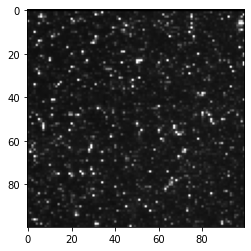

In [3]:
plt.imshow(frame_a[:100,:100],cmap=plt.cm.gray)

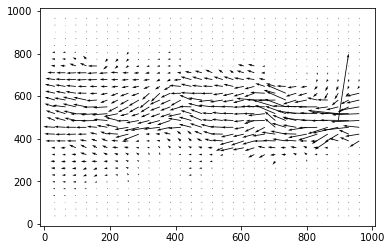

In [4]:
plt.quiver(x,y,u0,v0,scale=100)

In [5]:
np.mean(v0)

-0.008746830475092887

In [6]:
u1, v1, mask = validation.global_std( u0, v0)
# OpenPIV module that replaces fake vectors with 0 if below a certain threshhold

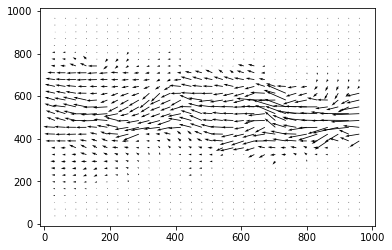

In [7]:
plt.quiver(x,y,u1,v1,scale=100)

In [8]:
u2, v2 = filters.replace_outliers( u1,v1,method='localmean', max_iter=5,
                                kernel_size = 2)

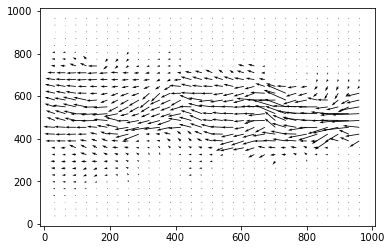

In [9]:
plt.quiver(x,y,u2,v2,scale=100)

In [10]:
# Invalid velocity vectors are replaced with a weighted average of neighbouring elements 
# that are not valid themselves. For the local mean method the kernel size is used to find
# the weighted average. If the surrounding elements are not valid then iterations are used 
# upto a point where variation in the region is below a certain threshold 


x, y, u3, v3 = scaling.uniform(x, y, u2,
                               v2,
                               scaling_factor = 1)


# field_shape = pyprocess.get_field_shape(image_size=frame_a.shape,search_area_size=searchsize,overlap=overlap)


Instantaneous Velocity Profile

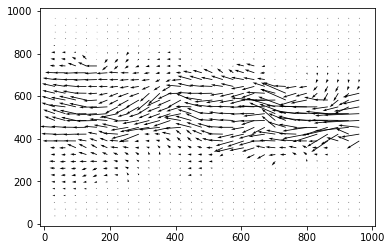

In [11]:
plt.quiver(x,y,u3,v3)

Above is the instantaneous velocity profile. Below is the instantaneous velocity profile from the paper

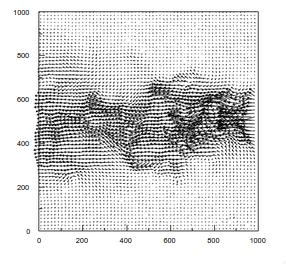

The interrogation resolution for the image publised in the paper is 32x32 pixel

Upon visual inspection the only difference seems to be that the image in the paper has more number of arrows. 



Average Velocity Profile code and plot

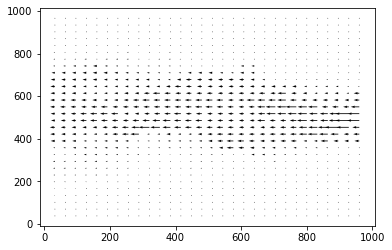

In [12]:
t = []
avgv = []
oxavg = []
orr = np.empty([30,30])
orra = np.empty([30,30])
v4 = np.zeros([30,30]) 

for i in range(0,30):
    t.append(x[0][i])
    
for i in range(0,30):
    osum = 0
    for j in range(0,30):
        orr[j][i] = (math.sqrt(u3[j][i]*u3[j][i] + v3[j][i]*v3[j][i]))
        osum = osum+orr[j][i]
    oxavg.append(osum/30)
    
for i in range(0,30):
    for j in range(0,30):
        orra[j][i]=-orr[j][i]/oxavg[i]
        
plt.quiver(x,y,orra,v4,scale = 150)  

Above figure is the average velocity profile from the code and the following is from the paper

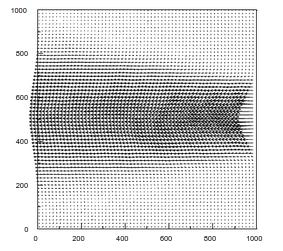

The average velocity profile is very different from the one in the paper. I assume that the averaging scheme followed was different. Averaging scheme followed in this notebook:

velocity at that point = instantaneous velocity at that point/average of all velocities at that x location

Above 2 figures were compared with Figure 2 of the associated published paper accompanying these datasets. The paper can be found here (https://www.researchgate.net/publication/226404189_Main_results_of_the_Second_International_PIV_Challenge).

The interrogation resolution for the image publised in the paper is 32x32 pixel


In [13]:
import numpy as np
from openpiv import windef
from openpiv.test import test_process 
from openpiv import preprocess
import pathlib
import os
import matplotlib.pyplot as plt

frame_a, frame_b = test_process.create_pair(image_size=256)
shift_u, shift_v, threshold = test_process.shift_u, test_process.shift_v, \
                              test_process.threshold

settings = windef.Settings()
settings.windowsizes = (128,)
settings.overlap = (64,)
settings.num_iterations = 1
settings.correlation_method = 'circular'
settings.sig2noise_method = 'peak2peak'
settings.subpixel_method = 'centroid'
settings.sig2noise_mask = 20


def test_invert_and_piv():
    """ Test windef.piv with invert option """

    settings = windef.Settings()
    'Data related settings'
    # Folder with the images to process
    settings.filepath_images = '/home/antariksh/Downloads/Aall/'
    settings.save_path = '.'
    # Root name of the output Folder for Result Files
    settings.save_folder_suffix = 'test'
    # Format and Image Sequence
    settings.frame_pattern_a = 'A001a.tif'
    settings.frame_pattern_b = 'A001b.tif'

    settings.num_iterations = 1
    settings.show_plot = True
    settings.scale_plot = 100
    settings.show_all_plots = True
    settings.invert = True

    windef.piv(settings)
    
    




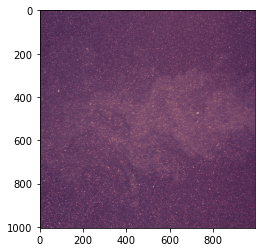

global filter invalidated 0 vectors
std filter invalidated 1 vectors
median filter invalidated 3 vectors
s2n filter invalidated 23 vectors


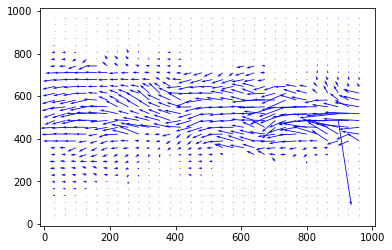

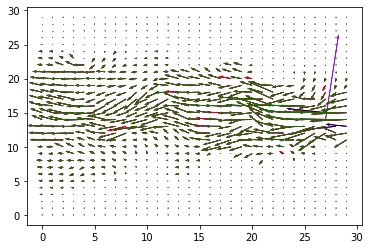

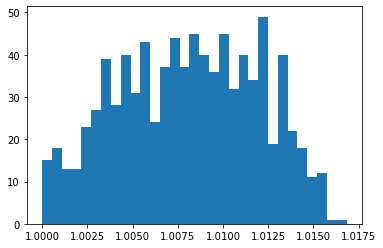

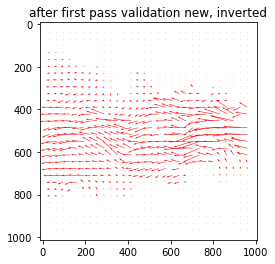

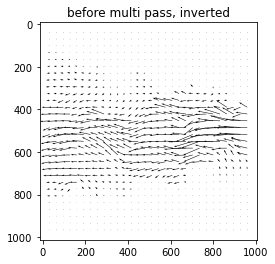

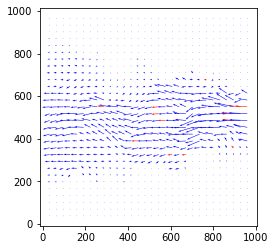

Image Pair 1


In [14]:
test_invert_and_piv()